# Machine Learning for Khan Academy Classification

This project uses a bag of words model with several classifiers in order to predict the subject matter behind a Khan Academy video from its transcript.

In [81]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, Lasso, Perceptron
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

/usr/local/var/pyenv/versions/3.5.1/envs/clique/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Data Cleaning

Here, we generate the bag of words features from the text files generated by `load_data.py`.

In [7]:
parent_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(parent_dir, 'data')
transcript_dir = os.path.join(data_dir, 'transcripts')
data_csv_path = os.path.join(data_dir, 'data.csv')

with open(data_csv_path, 'r') as f:
    reader = csv.reader(f)
    text_files, y_list = list(zip(*reader))
        
text_paths = [os.path.join(transcript_dir, text_file) for text_file in text_files]    
count_vect = CountVectorizer()
X = count_vect.fit_transform(text_paths)
y = np.array(y_list)

## Validation and Testing

This part simply splits the data and defines helper functions for validation and test scores.

In [18]:
train_val_index, test_index = next(StratifiedShuffleSplit(test_size=0.2).split(X, y))
X_train_val, y_train_val = X[train_val_index], y[train_val_index]
X_test, y_test = X[test_index], y[test_index]
train_index, val_index = next(StratifiedShuffleSplit(test_size=0.25).split(X_train_val, y_train_val))
X_train, y_train = X[train_index], y[train_index]
X_val, y_val = X[val_index], y[val_index]


def get_validation_score(clf):
    clf.fit(X_train.toarray(), y_train)
    y_pred = clf.predict(X_val.toarray())
    return accuracy_score(y_val, y_pred)
    
        
def get_test_score(clf):
    clf.fit(X_train.toarray(), y_train)
    y_pred = clf.predict(X_test.toarray())
    return accuracy_score(y_test, y_pred)

In [46]:
for C in [0.01, 0.1, 1, 10, 100]:
    svc = SVC(kernel='linear', C=C)
    print(get_validation_score(svc))

0.125
0.45
0.475
0.5
0.5


In [49]:
for n_neighbors in [1, 2, 3, 4, 5, 6]:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    print(get_validation_score(knn))

0.35
0.4
0.4375
0.3625
0.4
0.35


In [55]:
nb = GaussianNB()
print(get_validation_score(nb))

0.575


In [72]:
perceptron = Perceptron(penalty='l1')
print(get_validation_score(perceptron))

0.475


In [73]:
print(get_test_score(nb))

0.8


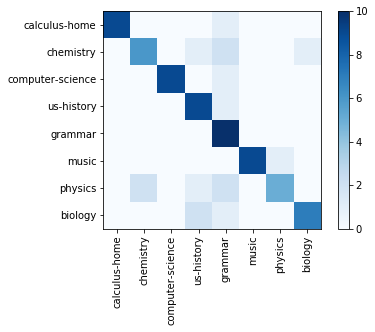

In [97]:
class_names = list(set(y))
nb.fit(X_train.toarray(), y_train)
y_pred = nb.predict(X_test.toarray())
cm = confusion_matrix(y_test, y_pred, labels=class_names)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
plt.colorbar()
plt.show()